In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline

import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import numpy as np
import pytz
import pandas as pd

from analysis import get_ticker_history, get_etfs_history, History

MOSCOW_TIMEZONE = pytz.timezone('Europe/Moscow')

# From rest
# client = openapi.sandbox_api_client(token)
# client.sandbox.sandbox_register_post()
# client.sandbox.sandbox_clear_post()
# client.sandbox.sandbox_currencies_balance_post(sandbox_set_currency_balance_request={"currency": "USD", "balance": 1000})


# From streaming
# candle_subs = [{'figi': 'BBG000B9XRY4', 'interval': '1min'}, {'figi': 'BBG009S39JX6', 'interval': '1min'}]
# orderbook_subs = [{'figi': 'BBG0013HGFT4', 'depth': 1}, {'figi': 'BBG009S39JX6', 'depth': 3}]
# instrument_info_subs = [{'figi': 'BBG000B9XRY4'}, {'figi': 'BBG009S39JX6'}]

# run_stream_consumer(token,
#                     candle_subs, orderbook_subs, instrument_info_subs,
#                     on_candle_event=print_event,
#                     on_orderbook_event=print_event,
#                     on_instrument_info_event=print_event)



In [2]:
end = dt.datetime.now(dt.timezone.utc)
start = end - dt.timedelta(weeks=52)
interval = 'day'
ticker='FXGD'

# print(etfs)


# print(market.market_candles_get(figi=figi, _from=start.isoformat(), to=end.isoformat(), interval=interval))
# ['payload']['instruments'][0]['figi']

ticker_history = get_ticker_history(ticker=ticker, start=start, end=end, interval=interval)

Text(0.5, 1.0, 'FXGD')

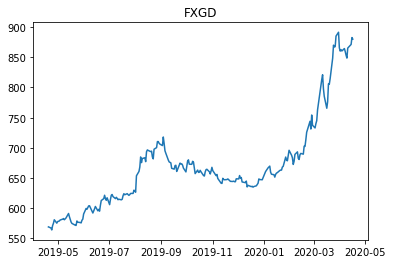

In [3]:
plt.figure()
plt.plot(ticker_history['time'].values, ticker_history['c'])
plt.title(ticker)

In [4]:
etfs_history, etf_tickers = get_etfs_history()

## Download and store history

In [28]:
hist_daily = History(interval='day')
# display(hist_daily.data.time.dtype)
hist_daily.update(reload=0)
hist_daily.data

Getting forecast with interval=day:   0%|          | 0/1 [00:00<?, ?it/s]

Local history data loaded successfully


Getting forecast with interval=day: 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]

Server returned an empty reply for the following period: [Timestamp('2020-04-17 07:00:00+0000', tz='UTC'), datetime.datetime(2020, 4, 18, 15, 9, 32, 82007, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200), 'CEST'))]!


ValueError: No objects to concatenate

In [22]:
hist_daily.data.time.max()

Timestamp('2020-04-13 07:00:00+0000', tz='UTC')

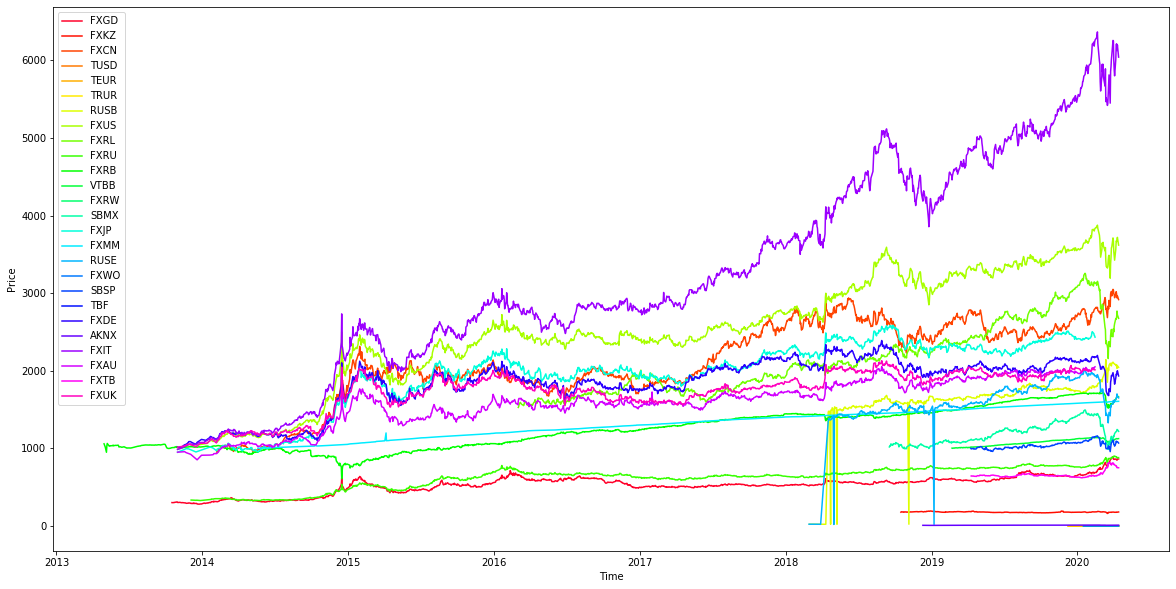

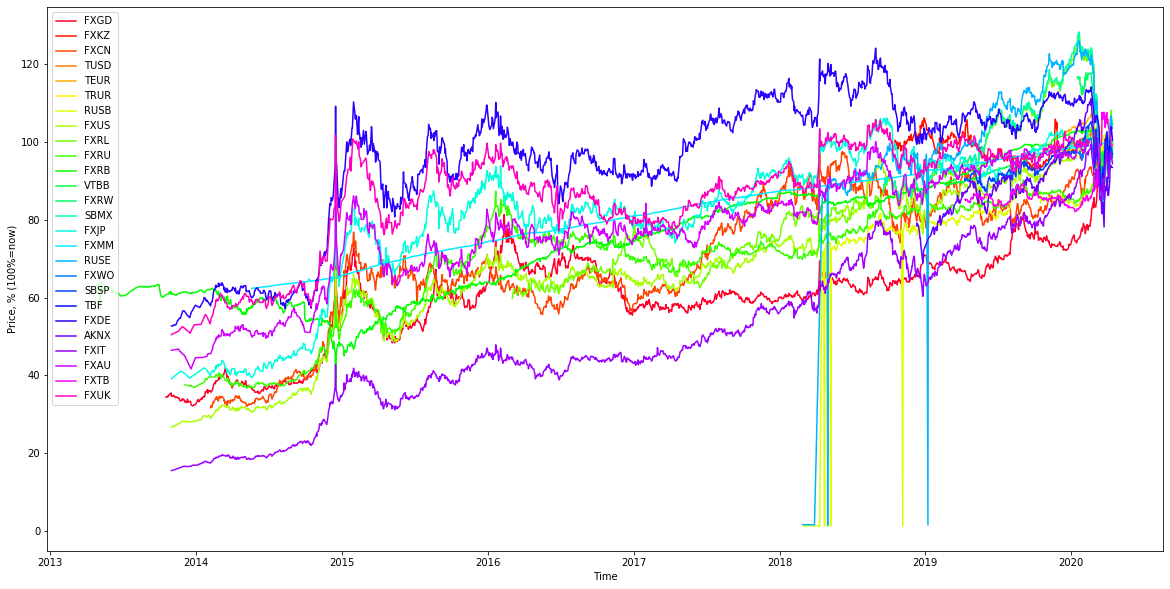

In [6]:
data = hist_daily.data
tickers = hist_daily.tickers
# print(data['time'].dtype)

M = len(hist_daily.tickers)
cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=M-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

def get_last_not_nan(lst):
    for el in lst[::-1]:
        if not np.isnan(el):
            return el
        
    return np.nan


plt.figure(figsize = (20,10))
ax = plt.gca()
ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(M)])
for ticker in tickers:
    filter = (data.ticker == ticker)
    t = data.loc[filter, 'time'].values
    y = data.loc[filter, 'c'].values # / get_last_not_nan(data[ticker+'_c']) * 100
#     print(ticker, y)
    plt.plot(t, y, label=ticker)
    
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend()

plt.figure(figsize = (20,10))
ax = plt.gca()
ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(M)])
for ticker in tickers:
    filter = data.ticker == ticker
    t = data.loc[filter, 'time'].values
    y = data.loc[filter, 'c'] / get_last_not_nan(data.loc[filter, 'c']) * 100
    plt.plot(t, y, label=ticker)
    
plt.ylabel('Price, % (100%=now)')
plt.xlabel('Time')
plt.legend()

## Basic statistics

In [25]:
hist_daily.statistics()

max_time:  2020-04-13 07:00:00+00:00
             ticker     max52w     min52w
figi                                     
BBG000000000   TUSD     0.0997     0.0831
BBG000000001   TRUR     5.2800     4.7800
BBG000000002   TEUR     0.1043     0.0887
BBG004HNZFH2   FXRB  1737.0000  1510.0000
BBG005DXDPK9   FXGD   894.8000   564.2000
BBG005H7MXN2   FXDE  2214.5000  1690.0000
BBG005HLK5V5   FXUK  2059.0000  1859.0000
BBG005HLSZ23   FXUS  3882.0000  3193.0000
BBG005HLTYH9   FXIT  6340.0000  4557.0000
BBG005HM5979   FXJP  2509.0000  2200.0000
BBG005HM6BL7   FXAU  2048.0000  1882.0000
BBG005N1KZX4   FXRU   901.1000   735.6000
BBG005VKB7D7   FXCN  3052.0000  2378.0000
BBG006GYFHV6   FXMM  1608.9000  1514.2000
BBG0073DLHS1   FXRL  3270.5000  2243.0000
BBG00KMXFK61   RUSE  2017.0000  1350.5000
BBG00KMXH2C2   RUSB  2199.0000  1648.0000
BBG00M0C8YM7   SBMX  1510.0000   977.0000
BBG00M8C8Y03   FXKZ   194.4000   162.9000
BBG00MF4JRQ8   VTBB  1142.4000  1016.0000
BBG00NNQMD85   AKNX    14.2000    10.02